# Regression Scikit learn
### Predicting blood glucose levels

Concept: Regression problem using women's health dataset.
 Steps:
 - Load dataset as a pandas DataFrame.
 - Preview first 5 rows.
 Features include:
   - Number of pregnancies
   - Triceps skinfold measurements
   - Insulin levels
   - Body Mass Index (BMI)
   - Age (years)
   - Diabetes status (1 = diagnosed, 0 = not diagnosed)
 Goal: Predict blood glucose levels based on these features.

In [2]:
import pandas as pd
import os

# Download the dataset if it does not exist
if not os.path.exists('diabetes.csv'):
	url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
	diabetes_df = pd.read_csv(url)
	diabetes_df.to_csv('diabetes.csv', index=False)
else:
	diabetes_df = pd.read_csv('diabetes.csv')

print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


---------------------------------------------------------------------------
Preparing features and target for regression:
Split dataset into features (X) and target (y) as required by scikit-learn.
X contains all columns except blood glucose; y contains the blood glucose values.
Convert both to NumPy arrays and optionally check their types.

In [9]:
X = diabetes_df.drop(columns=['Glucose']).values
y = diabetes_df['Glucose'].values
print (type(X), type(y))  # Both should be numpy.ndarray

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


---------------------------------------------------------------------------
Predicting blood glucose using a single feature (BMI):

* Slice out BMI column from `X` as `X_bmi`.
* Check shapes: `y` is 1D, `X_bmi` must be 2D for scikit-learn.
* Reshape `X_bmi` using NumPy (`reshape(-1, 1)`) to make it 2D.
* Confirm new shape is correct for model input.


In [8]:
X_bmi = X[:, 5].reshape(-1, 1)  # BMI is the 6th column
y = y.reshape(-1, 1)  # Reshape y to be a 2D array
print(y.shape,X_bmi.shape)  # Should be (768, 1)

(768, 1) (768, 1)


---------------------------------------------------------------------------
Plotting glucose vs. body mass index

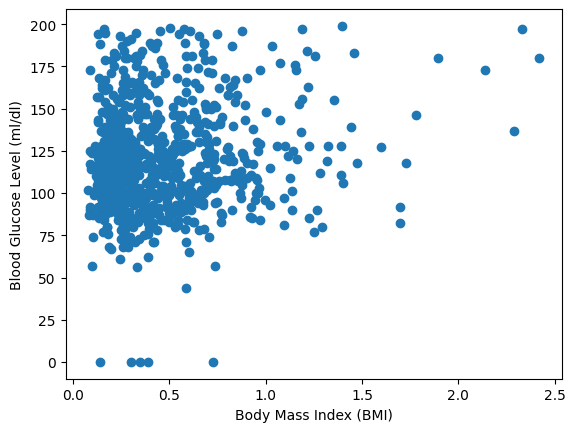

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Blood Glucose Level (ml/dl)')
plt.show()

Linear regression fits a straight line to data
Same .fit() and .predict() workflow as classification
Predicting on training data gives the "line of best fit"
Combines scatter plot (data) with line plot (model) for visualization
Mechanics of linear regression covered in next video

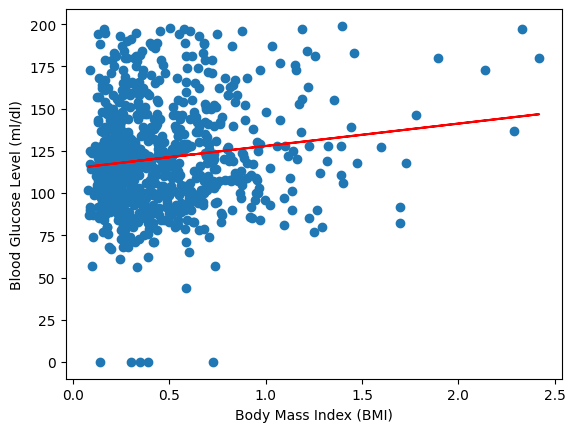

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Blood Glucose Level (ml/dl)')
plt.show()